#**Álgebra Linear Algorítmica 2021.2**

**Professor: João Vitor de Oliveira Silva**

**Laboratório 4**





*Para realizar uma cópia editável deste esqueleto, você pode clicar em Arquivo > Salvar uma cópia no Drive. Você pode remover as células de texto de enunciado e de avisos*, **mas mantendo as células de texto que marcam o início das questões.**

---
###**Avisos**:


*   **Sua solução deve ser devidamente comentada, usando células de texto e/ou códigos desenvolvidos.**
*   **Como já informado, soluções com plágio serão desconsideradas e receberão grau 0.**

*   **O trabalho pode ser feito individualmente ou em dupla.**

* **O nome do seu arquivo contendo a solução deve ser**
$$\mathtt{nome\_DRE\_lab04.ipynb}$$ ou $$\mathtt{nome1\_DRE\_nome2\_DRE2\_lab04.ipynb}$$


In [1]:
# Bibliotecas que sao necessarias ou podem auxiliar a realizacao desta atividade
import numpy as np
import scipy as sp
import scipy.linalg
from google.colab import files
import pandas as pd

## Enunciado do problema




*O sistema PageRank é usado pelo motor de busca Google para ajudar a determinar a relevância ou importância de uma página. Foi desenvolvida pelos fundadores do Google, Larry Page e Sergey Brin enquanto cursavam a Universidade de Stanford em 1998. O Google mantém uma lista de bilhões de páginas em ordem de importância, isto é, cada página tem sua importância na Web como um todo; esse Banco de Páginas mantém desde a página mais importante do mundo até a menos importante. Essa importância se dá pelo número de votos que uma página recebe. Um voto é um link em qualquer lugar da Web para aquela página. Votos de páginas mais importantes valem mais do que votos de páginas menos importantes.* (extraído de [Wikipedia em português](https://pt.wikipedia.org/wiki/PageRank)). 












![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/PageRank-hi-res.png/640px-PageRank-hi-res.png)


Muito embora o PageRank tenha se originado no contexto de ranqueamento de páginas da Web, o mesmo é aplicado para realizar um ranqueamento de qualquer grafo. Há aplicações em diversas áreas do conhecimento, como química, biologia, ciência de redes e sistemas de votação.

Nesta atividade, você irá realizar o PageRank sobre dois grafos: um pequeno que servirá para fins didáticos e um outro que representa artigos da Wikipedia e suas ligações.

### Introdução à modelagem matemática do problema

 - A rede é representada por meio de um grafo direcionado. Neste grafo, os sites são seus nós (ou vértices) e os links entre as páginas são suas arestas.
 - É considerada uma abordagem recursiva para se pontuar os sites: o link de uma página $k$, que definimos de alguma maneira importante, pontua mais que uma outra menos importante.
 - Pontuação de um site  $x_i$   é dada pela soma das pontuações dos outros $x_j$    que o apontam, divididas pela quantidade de sites que esse último aponta $n_j$.
 - Importante: na ”democracia'' da internet, você não pode votar em si mesmo! Ou seja, não é permitido se ter um link de uma página $i$ para a própria.    

---
Considere o seguinte exemplo simples:


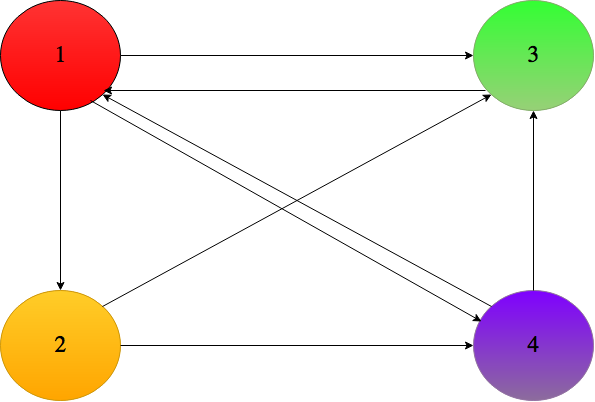


Usando as considerações levantadas, é possível afirmar que a pontuação $x_1$, associada ao nó (ou página) $1$, será dada por:


$$x_1 = x_3 + \frac{x_4}{2} \hspace{1mm}.$$

Só há uma aresta (ou link) saindo do nó $3$, portanto, o nó $1$ irá receber integralmente sua pontuação. Entretanto, como há duas arestas saindo do nó $4$, apenas metade da pontuação é recebida pelo nó $1$.

Seguindo com o mesmo princípio, chega-se nas seguintes equações para os nós $2$, $3$ e $4$:

$$\begin{align*}
x_2 &= \frac{x_1}{3} \\ 
x_3 &= \frac{x_1}{3} + \frac{x_2}{2} + \frac{x_4}{2} \\
x_4 &= \frac{x_1}{3} + \frac{x_2}{2}
\end{align*}$$

Podemos escrever este problema de forma matricial:

$$\underbrace{\begin{bmatrix}
0 & 0 & 1 & \frac{1}{2} \\
\frac{1}{3} & 0 & 0 & 0 \\
\frac{1}{3} & \frac{1}{2} & 0 & \frac{1}{2} \\
\frac{1}{3} & \frac{1}{2} & 0 & 0 
\end{bmatrix}}_{P} \underbrace{\begin{bmatrix} x_1 \\[0.12cm] x_2 \\[0.12cm] x_3 \\[0.12cm] x_4 \end{bmatrix}}_{x} = \underbrace{\begin{bmatrix} x_1 \\[0.12cm] x_2 \\[0.12cm] x_3 \\[0.12cm] x_4 \end{bmatrix}}_{x} $$

É possível notar que o vetor de pontuações $x = [x_1, x_2, x_3, x_4]^t$ é nada mais nada menos do que um autovetor desta matriz $P$, em particular, um autovetor associado ao autovalor $\lambda = 1$. Se $\lambda = 1$ fosse o autovalor dominante desta matriz, o método da potência poderia ser aplicado. Mas o que garante que este autovalor será o dominante?

Felizmente, esta matriz $P$ é uma matriz estocástica (ou probabilística). Isto é, a soma dos elementos de cada uma de suas colunas sempre resulta em $1$. Matrizes que possuem esta propriedade possuem o autovalor $\lambda = 1$ como o dominante. Seguindo nesta linha probabilística, é possível interpretar o problema de determinar o ranqueamento da rede sob uma outra ótica: se uma pessoa navegar por esta rede e tivesse uma probabilidade de migrar de uma página $j$ para uma página $i$ sendo dada pelo elemento $p_{ij}$ desta matriz, qual seria a frequência com que esta pessoa passará por uma determinada página $m$ após um longo período de tempo? A pontuação da página $x_m$ acaba sendo justamente esta frequência.

#### Possíveis adversidades

É possível que haja um grafo representando a seguinte situação:

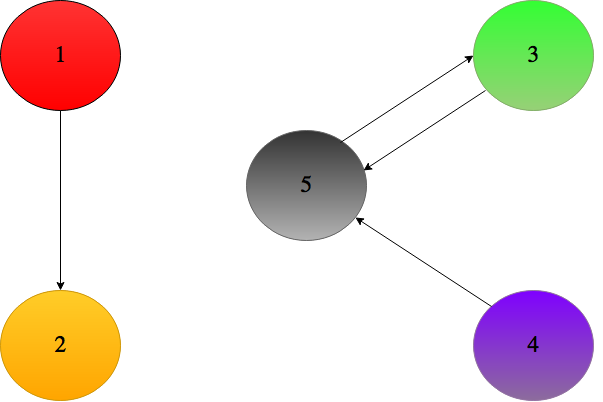




Há duas situações adversas que podem ser destacadas

- O nó (página) $2$ não possui nenhuma aresta (link) saindo do mesmo. Este problema é chamado de **dangling node**. 
- Não há um caminho possível entre todos os pares de nós (páginas). Por exemplo, partindo do nó $1$, é impossível caminhar até o nó $5$. Este problema é chamado de **rede desconectada**.

A primeira faz com que a matriz $P$ do problema não seja mais uma matriz estocástica (ou probabilística). Já a segunda faz com que o autoespaço associado ao autovalor 1 tenha dimensão maior do que 1, ou seja, o ranqueamento deixa de ser único. Para contornar estas adversidades, introduz-se um efeito chamado teletransporte:

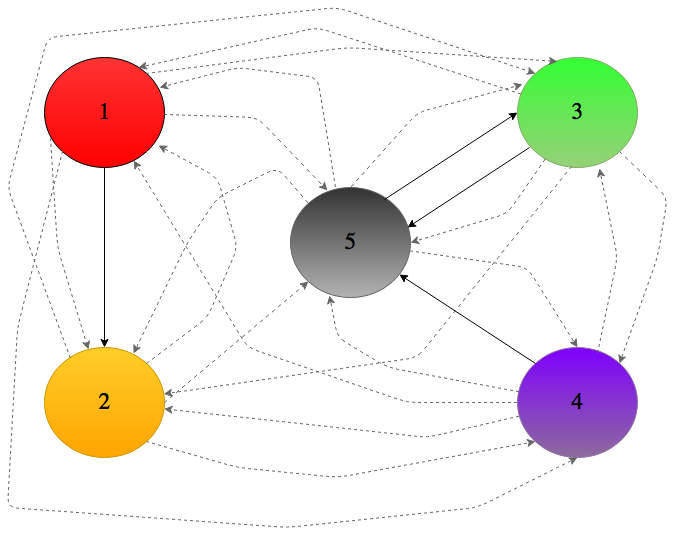



O teletransporte é essencialmente a introdução de arestas (links) artificiais. Do ponto de vista probabilístico, permite-se caminhar diretamente de um nó $j$ para um nó $i$ com uma pequena probabilidade comparada a transições seguindo as arestas (links) originais. Pensando em termos de navegação da Web, é possível que o usuário de migre de uma página $j$ para outra $i$ sem ser por um link existente entre estas páginas.

### Modelagem matemática

Levando em conta toda a discussão levantada, é possível apresentar a modelagem final do problema do PageRank. Ao longo de todo o processo, são utilizados os seguintes escalares/vetores/matrizes:

- matriz ($n \times n$) $P$ : uma matriz tal que o elemento $p_{ij}$ representa a probabilidade de se caminhar do nó $j$ para o nó $i$ (sem teletransporte, usando a estrutura original de nós e arestas);
- vetor ($n \times 1$) $s$: um vetor que possui todas as suas coordenadas iguais a 1, isto é, $s = e_1 + e_2 + e_3 + \ldots + e_n$;
- vetor ($n \times 1$) $x^{(k)}$: um vetor em que cada uma de suas coordenadas representa a frequência (relativa) de tempo que se passou em uma determinada página após um tempo (iteração) $k$. Após um determinado valor de $k$, irá ser o vetor de pontuações que se deseja calcular;
- escalar $\alpha$: número real conhecido como *damping factor*. Este valor é a probablidade de se seguir a estrutura original de nós (páginas) e arestas (links) ao invés de realizar um teletransporte. O valor usado pelo Google é $0.85$. 


O método da potência é aplicado sobre a seguinte matriz:

$$\begin{align}\overline{P} = \alpha P + \frac{1-\alpha}{n} \hspace{1mm}ss^t \end{align}$$

É possível garantir que esta matriz sempre possui um único ranqueamento e o autovalor 1 é o dominante.


### Considerações computacionais

Representar na memória a matriz $\overline{P}$ é indesejado, uma vez que isso causa **perda de esparsidade**. 

$$ P = \begin{bmatrix}
0 & 0 & 1 & \frac{1}{2} \\
\frac{1}{3} & 0 & 0 & 0 \\
\frac{1}{3} & \frac{1}{2} & 0 & \frac{1}{2} \\
\frac{1}{3} & \frac{1}{2} & 0 & 0 
\end{bmatrix}, \qquad \color{red}{\overline{P} = \begin{bmatrix} \textbf{0.037} &   \textbf{0.037} & 0.89 & 0.46\\ 0.32 & \textbf{0.037} & \textbf{0.037} & \textbf{0.037} \\ 0.32 & 0.46 & \textbf{0.037} & 0.46 \\ 0.32 & 0.46 & \textbf{0.037} & \textbf{0.037}\end{bmatrix}} $$

Mas afinal de contas o que é uma matriz esparsa? 

Uma **matriz esparsa** é uma matriz que possui boa parte de seus elementos iguais a 0. Quanto maior for o número de elementos iguais a 0, maior a esparsidade de uma matriz. Existem estruturas de dados e rotinas especializadas para a representação e operações (como produto matriz-vetor) que envolvem matrizes esparsas. Realizar cálculos do PageRank usando uma matriz esparsa como $P$ ao invés de uma matriz densa ("cheia" de elementos) como $\overline{P}$ tende a ser mais vantajoso, ainda mais se o ranqueamento for sobre grafos com muitos nós (páginas). 

Portanto, ao invés de construir $\overline{P}$ explicitamente e aplicá-la sobre um vetor, o método da potência terá sua $k$-ésima iteração na seguinte forma:

$$\begin{align*}x^{(k+1)} &= \overline{P}x^{(k)} \\&= \color{blue}{\alpha Px^{(k)} + \frac{1-\alpha}{n} \hspace{1mm}s (s^t x^{(k)}) } \end{align*}$$

Desta forma, usa-se a matriz $P$ (que é esparsa) nos cálculos e a parcela referente ao teletransporte envolve apenas operações básicas de vetores (produto interno e multiplicação entre escalar e vetor).




### Construção da matriz $P$ a partir da matriz de adjacências $A$ de um grafo

Uma das representações matriciais de um grafo é por meio da **matriz de adjacência**. A matriz de adjacência $A$ de um grafo é definida como:

$$A_{ij} = \begin{cases}1,\text{ se houver uma aresta do nó }i \text{ para o nó }j \\ 0, \text{ caso contrário }.\end{cases}$$

No caso do exemplo simples


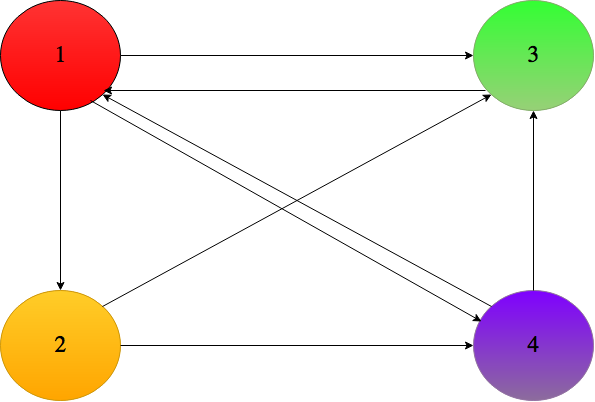




a matriz de adjacência é dada por 

$$ A = \begin{bmatrix} 0 & 1 & 1 & 1\\ 0 & 0 & 1 & 1 \\ 1 & 0 & 0 & 0 \\ 1 & 0 & 1 & 0 \end{bmatrix}.$$


Existe um procedimento bem simples para se obter a matriz $P$ a ser usado no PageRank:
 

1.  Calcular a matriz transposta $A^t$: $$A^t = \begin{bmatrix} 0 & 0 & 1 & 1\\ 1 & 0 & 0 & 0 \\ 1 & 1 & 0 & 1 \\ 1 & 1 & 0 & 0 \end{bmatrix}$$
2.  Normalizar cada coluna de $A^t$ pela soma dos elementos presentes nesta mesma coluna: $$P = \begin{bmatrix}
0 & 0 & 1 & \frac{1}{2} \\
\frac{1}{3} & 0 & 0 & 0 \\
\frac{1}{3} & \frac{1}{2} & 0 & \frac{1}{2} \\
\frac{1}{3} & \frac{1}{2} & 0 & 0 
\end{bmatrix}$$


  


## Exercício 1

Complete a função abaixo que recebe uma matriz de adjacências de um grafo e retorna a matriz $P$ do PageRank.

Dicas:


*   **``M.T``** retorna a transposta de uma matriz (Numpy array) de nome **``M|``** 
*   **``M[:,i]``** retorna a i-ésima coluna de uma matriz (Numpy array) de nome **``M``** 
*   **``np.sum(v)``** calcula a soma de todos os elementos de um vetor (Numpy array) de nome **``v``**.

**Antes de realizar a normalização de uma determinada coluna, verifique se a soma de seus elementos é maior do que 0. Se não fizer isso, poderá realizar divisões por 0 indesejadas.**


In [2]:
def adj_to_P(A):
  """ Receives graph adjacency matrix and returns pagerank P matrix 
  numpy array -> numpy array"""
  n = A.shape[0]
  m = A.shape[1]
  P = A.copy()

  ### Completar ###
  T = A.T

  for i in range(n):
    col = T[:,i]
    soma = np.sum(col)
    if soma != 0:
       T[:,i] = T[:,i] / soma
  return T
  ###           ### 

In [3]:
"""
TESTE
"""

A = np.array([[0.,1.,1.,1.],
              [0.,0.,1.,1.],
              [1.,0.,0.,0.],
              [1.,0.,1.,0.]])
A = adj_to_P(A)
A

array([[0.        , 0.        , 1.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        , 0.5       ],
       [0.33333333, 0.5       , 0.        , 0.        ]])

## Exercício 2



Complete a função abaixo, que recebe uma matriz $P$ do PageRank e obtém o ranqueamento do grafo, ou seja, o autovetor dominante $x$ de $\overline{P}$. **Não construa** $\overline{P}$ **e aplique o método da potência diretamente sobre esta matriz. Faça as iterações como destacado em "Considerações computacionais" em azul.**

Dicas:

*   **``np.random.rand(n)``** retorna um vetor aleatório (Numpy array) com $n$ elementos.
* **``np.ones(n)``** retorna um vetor (Numpy array) com suas $n$ coordenadas iguais a 1.



In [4]:
def pmethod_pgrank(P, tol = 5e-5, alpha = 0.85):
  """ Receives pagerank P matrix and returns the rank (or scores) eigenvector x.
  Default arguments are tol (power method tolerance) and alpha (teletransport weight).
  numpy array -> numpy array"""


  n = P.shape[0]
  
  ### Completar ###
  s = np.ones(n)
  x = np.random.rand(n)
  x = x / np.linalg.norm(x)
  y = alpha * P @ x + ((1 - alpha) / n) * s * s.T @ x
  a = x.T @ y
  while np.linalg.norm(y - a * x) > tol:
    x = y / np.linalg.norm(y)
    y = alpha * P @ x + ((1 - alpha) / n) * s * s.T @ x
    a = x.T @ y
  
  return y
  ###           ###

In [5]:
autovetor = pmethod_pgrank(A)
autovetor

array([0.69648364, 0.26827969, 0.54478397, 0.38230434])

## Exercício 3



Qual o ranqueamento do grafo do exemplo simples?

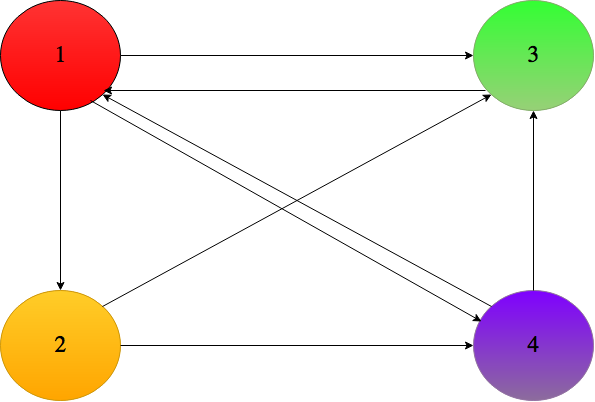

Sua resposta deve conter qual foi o vetor $x$ obtido. Verifique se seu resultado indica que a ordenação é de páginas é dada por (1,3,4,2). 

*Dica: para obter a ordenação decrescente dos elementos de um vetor (Numpy array), use* **``np.argsort(-x)``**. *Também lembre-se que a indexação em Python começa em 0*.

In [6]:
Adj_ex = np.array([[0.,1.,1.,1.],
                   [0.,0.,1.,1.],
                   [1.,0.,0.,0.],
                   [1.,0.,1.,0.]])
P = adj_to_P(Adj_ex)

In [7]:
P

array([[0.        , 0.        , 1.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        , 0.5       ],
       [0.33333333, 0.5       , 0.        , 0.        ]])

In [8]:
x = pmethod_pgrank(P)

In [9]:
rank = np.argsort(-x) 

In [10]:
rank

array([0, 2, 3, 1])

In [11]:
x

array([0.69646215, 0.26828532, 0.54478358, 0.38231095])

Resposta: O vetor x obtido ficou igual a aproximadamente [0.6965, 0.2683, 0.5448, 0.3823] e o rankeamento ficou como 1,3,4,2 conforme o enunciado.

## Exercício 3

### Link de wikipedia_graph.npz: [Download](https://drive.google.com/file/d/1x--9fLnGxAwTc6QevtTxmrYjKyOzKlqR/view?usp=sharing)
### e lógica para upload do arquivo


Faça o ranqueamento do grafo de artigos e links de parte da Wikipedia. *Fonte: O grafo foi obtido em [SNAP Wikispeedia](https://snap.stanford.edu/data/wikispeedia.html) e depois processado em um único arquivo (o que está para download).*



In [12]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
Adj_wikip = sp.sparse.load_npz(fn)

Saving wikipedia.npz to wikipedia.npz
User uploaded file "wikipedia.npz" with length 203737 bytes


In [13]:
Adj_wikip

<4604x4604 sparse matrix of type '<class 'numpy.float64'>'
	with 119882 stored elements in Compressed Sparse Row format>

In [14]:
P_wikip = adj_to_P(Adj_wikip)

In [15]:
x_wikip = pmethod_pgrank(P_wikip)

In [16]:
rank_wikip = np.argsort(-x_wikip)

In [17]:
rank_wikip

array([4297, 1568, 1433, ...,  937, 3413,    0])

Resposta: O rank foi obtido, como pode ser visto acima

## Exercício 4

### labels.csv: [Download](https://drive.google.com/file/d/1-nqiMr2ix1toOz4J4XAZmYCXKDURur_-/view?usp=sharing)
### e lógica para upload do arquivo


Este arquivo .csv é uma tabela que contém a relação entre o id de um determinado artigo da Wikipedia e seu nome. Usando o rank que calculou, informe a posição de relevância dos artigos:

- Brazil
- Linear_Algebra
- Google
- Alan_Turing


Pense em algum artigo de seu interesse que acredita que seja de grande relevância e depois diga também sua posição.

**Lembre-se novamente que a indexação em Python começa em 0.**

In [18]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  id2label = pd.read_csv(fn, header = None)[0].values

Saving node_labels.csv to node_labels.csv
User uploaded file "node_labels.csv" with length 68845 bytes


In [19]:
id2label

array(['%C3%81ed%C3%A1n_mac_Gabr%C3%A1in', '%C3%85land',
       '%C3%89douard_Manet', ..., 'Zoroaster', 'Zuid-Gelders', 'Zulu'],
      dtype=object)

In [20]:
# nó de índice 12 se refere ao seguinte artigo
id2label[12]

'15th_century'

In [21]:
# acha o índice associado a um determinado artigo, no caso, o artigo de nome "Donald_Knuth"
np.where(id2label == "Donald_Knuth")

(array([1230]),)

In [22]:
"""
RANK DE 'Brazil'
"""

id_page = np.where(id2label == "Brazil")[0][0]
rank = np.where(rank_wikip == id_page)[0][0]
rank

56

In [23]:
"""
RANK DE 'Alan Turing'
"""

id_page = np.where(id2label == "Alan_Turing")[0][0]
rank = np.where(rank_wikip == id_page)[0][0]
rank

1704

In [24]:
"""
RANK DE 'Algebra Linear'
"""

id_page = np.where(id2label == "Linear_algebra")[0][0]
rank = np.where(rank_wikip == id_page)[0][0]
rank

2229

In [25]:
"""
RANK DE 'Google'
"""

id_page = np.where(id2label == "Google")[0][0]
rank = np.where(rank_wikip == id_page)[0][0]
rank

1627

In [26]:
"""
RANK DE 'Batman'
"""

id_page = np.where(id2label == "Batman")[0][0]
rank = np.where(rank_wikip == id_page)[0][0]
rank

2789

Resposta:
Como mostrado acima, Brazil ficou em 57º lugar, Alan Turing em 1705º, Algebra Linear em 2230º, Google em 1628º e Batman em 2790º.
